<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRIXJO_AnGlrzm96u_FS8TTJTZ7UyamK8iVNQ&usqp=CAU' width=1300 height=500 style="
  display: block; margin-left: auto; margin-right: auto; ">

# <center>UK Road Accidents Data
- The UK government amassed traffic data from 2000 and 2016, recording over **1.8 million** accidents in the process and making this one of the most comprehensive traffic data sets out there. It's a huge picture of a country undergoing change.

#### Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly 
import plotly.express as ex
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression


sns.set(style= 'whitegrid', color_codes=True)
# %matplotlib inline

In [2]:
# to measure linear / non-linear relationship B/W two columns
# pip install ppscore
# import ppscore as ppscore

### 1. Data Import

In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/road-accident-united-kingdom-uk-dataset/UK_Accident.csv


In [6]:
df= pd.read_csv('../input/road-accident-united-kingdom-uk-dataset/UK_Accident.csv')
# final_df = pd.concat(sub_sets)
final_df= df
final_df.shape

(1504150, 33)

In [7]:
final_df.sample(4)

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
581588,11577,200901PY20167,547030.0,169910.0,0.112677,51.409102,1,2,3,1,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Wet/Damp,None,None,1,Yes,E01000738,2009
1494585,455132,201463BC06614,260000.0,282170.0,-4.060147,52.419524,63,3,4,1,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,W01001934,2014
352696,352696,200650D36Q630,329650.0,98540.0,-2.999292,50.782086,50,3,1,1,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,2,No,E01019888,2006
947343,377332,2011170L20341,454990.0,520370.0,-1.150824,54.575573,17,3,1,1,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01012116,2011


## <u> Que-1:
- What are the number of casualties in each day of the week? Sort them in descending order.

In [8]:
print(final_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Unnamed: 0                                   1504150 non-null  int64  
 1   Accident_Index                               1504150 non-null  object 
 2   Location_Easting_OSGR                        1504049 non-null  float64
 3   Location_Northing_OSGR                       1504150 non-null  float64
 4   Longitude                                    1504049 non-null  float64
 5   Latitude                                     1504150 non-null  float64
 6   Police_Force                                 1504150 non-null  int64  
 7   Accident_Severity                            1504150 non-null  int64  
 8   Number_of_Vehicles                           1504150 non-null  int64  
 9   Number_of_Casualties                         1

In [9]:
final_df['Year'].unique()
final_df

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504145,464692,2.01E+12,310037.0,597647.0,-3.417278,55.264773,98,2,2,1,...,No physical crossing within 50 meters,Darkeness: No street lighting,Snowing without high winds,Snow,None,None,2,Yes,NaN,2014
1504146,464693,2.01E+12,321509.0,574063.0,-3.230255,55.054855,98,3,2,2,...,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Snow,None,None,2,Yes,NaN,2014
1504147,464694,2.01E+12,321337.0,566365.0,-3.230826,54.985668,98,3,1,1,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,None,None,2,Yes,NaN,2014
1504148,464695,2.01E+12,323869.0,566853.0,-3.191397,54.990446,98,2,3,2,...,No physical crossing within 50 meters,Darkeness: No street lighting,Raining without high winds,Wet/Damp,None,None,2,Yes,NaN,2014


In [10]:
# dropping Junction_Detail as this column doesn't contribute anything
# final_df.drop(["Junction_Detail"],axis=1,inplace = True)

In [11]:
# As NULL values are less as compared to size of whole data
# So, Preprocessing the data and filling the null values with logically identified values from each feature.
final_df['Road_Surface_Conditions'].fillna(value = 'Normal', inplace = True)
final_df['Special_Conditions_at_Site'].fillna(value = 'None', inplace = True)
final_df['Carriageway_Hazards'].fillna(value = 'None', inplace = True)
final_df['Did_Police_Officer_Attend_Scene_of_Accident'].fillna(value = 'No', inplace = True)
final_df['Weather_Conditions'].fillna(value = 'Unknown', inplace = True)
final_df['Junction_Control'].fillna(value = 'None', inplace = True)
final_df['Location_Northing_OSGR'].fillna(value = 0, inplace = True)
final_df['Latitude'].fillna(value = 0, inplace = True)

In [12]:
data = {'Casualties_Count' : final_df['Number_of_Casualties'],
             'Day_of_Week' : final_df['Day_of_Week']}
accidents_per_week = pd.DataFrame(data)
accidents_per_week.groupby(by='Day_of_Week').sum().sort_values(by = 'Casualties_Count', ascending = False)

,Casualties_Count
Day_of_Week,
6,331934
5,299044
4,297756
3,294476
7,285261
2,284043
1,239532


In [15]:
cas_count= accidents_per_week.groupby(by='Day_of_Week').sum().sort_values(by = 'Casualties_Count', ascending = False)

In [16]:
# getting group-by size for sorting of color intensity according to Count values
size_gb= accidents_per_week.groupby(by='Day_of_Week').size()
dev_color= size_gb.argsort().argsort() # argsort for index wise sorting
pal= sns.color_palette('Reds', len(dev_color)) # choose color palette accordingly

<AxesSubplot:xlabel='Day_of_Week', ylabel='count'>

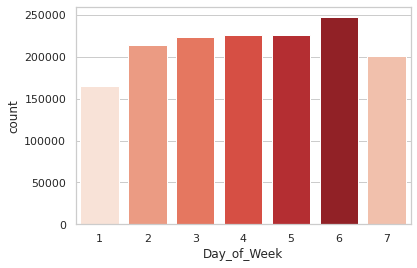

In [17]:
sns.countplot(x=accidents_per_week.Day_of_Week, 
              data=accidents_per_week,
              palette=np.array(pal[::])[dev_color]) 
# 6th day of the week has seen more number of accidents

## <u> Que-3:
- On each day of the week, what is the maximum and minimum speed limit on the roads the accidents happened?

In [18]:
accidents_per_week['Speed_Limit'] = final_df.Speed_limit
accidents_per_week.sample(4)

,Casualties_Count,Day_of_Week,Speed_Limit
183752,1,5,30
186247,1,4,30
950763,4,2,40
506818,2,4,60


- For this Question we'll make use of SQL-Language 
- To use SQL use with Pandas there's Package <u> pandasql

In [19]:
# pip install -U pandasql
import pandasql as ps

In [ ]:
chunks = []
for val in range(1,8) : # Since there are 7 days, we're using the loop from 1 to 8.
    qurery1 = """select accidents_per_week.Day_of_Week, sum(accidents_per_week.Casualties_Count) Casualties_Count,
            max(accidents_per_week.Speed_Limit) Max_Speed ,min(accidents_per_week.Speed_Limit) Min_Speed
            from accidents_per_week where accidents_per_week.Casualties_Count > 0 and accidents_per_week.Day_of_Week= """+str(val)
    chunks.append(ps.sqldf(qurery1, locals())) # parameters (Query, db_url) and returns DataFrame
    
speed_limit_accident_data = pd.concat(chunks, ignore_index=True) # concatination of chunks

In [ ]:
speed_limit_accident_data

In [ ]:
val = ["Max-Speed","Min_Speed"]
plt.figure(figsize=(5,5))
sns.barplot(x='Day_of_Week', y = 'Min_Speed' , data=speed_limit_accident_data, palette='YlGnBu_r')
plt.show()
sns.barplot(x='Day_of_Week', y = 'Max_Speed' , data=speed_limit_accident_data, palette='YlGnBu')
plt.show()

## <u> Que-4: 
- What is the importance of Light and Weather conditions in predicting accident severity?
- What does your intuition say and what does the data portray?

In [ ]:
accident_severity_data = {'Light_Conditions' : final_df.Light_Conditions, 
                          'Weather_Conditions' : final_df.Weather_Conditions,
                          'Accident_Severity' : final_df.Accident_Severity}
accident_severity_df = pd.DataFrame(accident_severity_data)
accident_severity_df.sample(4)

In [ ]:
print(accident_severity_df.describe(),'\n')
print(accident_severity_df.info())

In [ ]:
# Converting Object data-type into Category datatype
for object_feature in accident_severity_df.dtypes[accident_severity_df.dtypes == 'object'].index :
     accident_severity_df[object_feature] = accident_severity_df[object_feature].astype('category')

In [ ]:
accident_severity_df.info()

In [ ]:
# One Hot Encoding the categorical columns
accident_severity_df = pd.get_dummies(data=accident_severity_df, columns=['Light_Conditions', 'Weather_Conditions'])

In [ ]:
accident_severity_df.sample(2)

In [ ]:
# Correlation between 'Accident_Severity' and rest of variables
accident_severity = accident_severity_df.corr().loc['Accident_Severity':] 
accident_severity = pd.DataFrame(accident_severity)

In [ ]:
# np.hstack(np.split(accident_severity, 1))
accident_severity

In [ ]:
plt.figure(figsize=(15,20))
sns.heatmap(accident_severity, vmin=-1, cmap='plasma_r', annot = True)

### <u>Intuition (Summary):
- As per our intuition, we can say that the number of accidents will be more when the light and weather conditions are at worse. Like when there is no there light present at night, the number of accidents could be more. Similarly, in bad weather conditions like too much winds, rainfall or snowing could lead to more number of accidents.

- From Data: From the above correlation matrix of the data, we can observe that both Light_conditions and Weather_Conditions doesn't have much effect on Accident_severity as they are almost close to 0. Light_conditions with Street Light present is more impactful compared to Weather_Conditions.

- So the interpretation could be like when Street Light is present compared Daytime, the number of accidents being caused and their severity are much higher.

## <u>Que-5: 
- To predict the severity of the accidents which columns are unnecessary as logically and should be dropped before implementing a any prediction (regression) model.

In [ ]:
# From the above correlation, we have seen that Light_Conditions and Weather_Conditions are not much impactful,
# so we can drop them
accident_severity_df =final_df.copy()
accident_severity_df.info()

In [ ]:
accident_severity_df['Pedestrian_Crossing-Human_Control'].value_counts() 
accident_severity_df['Pedestrian_Crossing-Physical_Facilities'].value_counts() 
accident_severity_df['Light_Conditions'].value_counts() 
accident_severity_df['Special_Conditions_at_Site'].value_counts() 
accident_severity_df['Carriageway_Hazards'].value_counts()
accident_severity_df['Junction_Control'].value_counts()

#### From above Numbers,
- Pedestrian_Crossing can be dropped as almost 90% of the data is None
- Pedestrian_Crossing-Physical_Facilities can be dropped as almost 80% of the data is None
- Light_Conditions can be dropped as earlier we have seen Light_Conditions & Weather_Conditions are not much impactful
- Special_Conditions_at_Site can be dropped as 90% data is None
- Carriageway_Hazards can be dropped as 90% data is None
- Did_Police_Officer_Attend_Scene_of_Accident can be dropped as Police comes after the accident has occured and it doesn't logically impact the severity of the accident
- Carriageway_Hazards can be dropped as 90% data is None 
- We can also drop Accident_Index as it only keeps the count of the accidents
- We can also drop Date, Time of Accidents as logically they don't impact the Severity of Accidents

In [ ]:
drop_cols= ['Pedestrian_Crossing-Human_Control','Pedestrian_Crossing-Physical_Facilities','Light_Conditions'
           ,'Special_Conditions_at_Site','Carriageway_Hazards','Carriageway_Hazards','Junction_Control'
           ,'Did_Police_Officer_Attend_Scene_of_Accident']

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x = 'Road_Type', y = 'Accident_Severity', data = accident_severity_df, palette='rocket')

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x = 'Road_Surface_Conditions', y = 'Accident_Severity', data = accident_severity_df, palette='rocket_r')

In [ ]:
# final_df.to_csv('UK_Accident.csv')

In [ ]:
for feature in accident_severity_df.dtypes[accident_severity_df.dtypes == 'object'].index :
    accident_severity_df.drop(columns = feature, inplace = True)

In [ ]:
accident_severity_df.info()

In [ ]:
corr_matrix = accident_severity_df.corr()
corr_matrix

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, vmin=-1, cmap='plasma_r')

In [ ]:
plt.figure(figsize=(18,5))
corr_matrix['Accident_Severity'].sort_values(ascending=False).plot(color='#ff000d')

In [ ]:
final_accident_severity_df = accident_severity_df.copy()
final_accident_severity_df.info()

In [ ]:
# deleting the columns with correlation < 0.02 and >-0.02 as they are not much impactful compared to others
for feature in accident_severity_df.dtypes[accident_severity_df.dtypes != 'object'].index :
    if(corr_matrix['Accident_Severity'][feature] < 0.02 and  corr_matrix['Accident_Severity'][feature] > -0.02) :
        final_accident_severity_df.drop(columns = feature, inplace = True) 
        
# Inversely proportional columns as well as they can impact the Accident_severity (> -0.02)

In [ ]:
# Impactful columns for Accident_Severity are as follows
final_accident_severity_df.sample(4)

## <u>Additive Work: 
- I've used Logistic Regression Model using scikit learn with cross validation = 5, where you predict the severity of the accident (Accident_Severity).
- here, i've not optimized hyperparameter but figured out what features will be best to use.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [ ]:
check = final_accident_severity_df.copy()
severity = check['Accident_Severity']
severity = pd.DataFrame(severity, columns = ['Accident_Severity'])

In [ ]:
severity.sample(3)

<u>**Multiclass classification**</u> with logistic regression can be done either through the one-vs-rest scheme in which for each class a binary classification problem of data belonging or not to that class is done, or changing the loss function to cross- entropy loss.

In the multiclass case, the training algorithm uses the one-vs-rest (OvR) scheme if the ‘multi_class’ option is set to ‘ovr’ and uses the cross-entropy loss if the ‘multi_class’ option is set to ‘multinomial’. (Currently, the ‘multinomial’ option is supported only by the ‘lbfgs’, ‘sag’ and ‘newton-cg’ solvers.) By default, multi_class is set to ’ovr’.

In [ ]:
model = LogisticRegression(solver = 'lbfgs', max_iter = 100)
score = cross_val_score(model, check, severity, cv = 5)
score.mean()

### I Hope You Liked the Notebook and Learned something new from the Notebook